In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy

In [5]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [9]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df['non_smoker'] = df['smoker'].str.contains('no')
df['non_smoker']

0       False
1        True
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337    False
Name: non_smoker, Length: 1338, dtype: bool

In [11]:
needed_cols = ['non_smoker','charges']

df[needed_cols]

,non_smoker,charges
0,False,16884.92400
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
...,...,...
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


In [12]:
smoker = df.loc[df['non_smoker']== False, needed_cols]
smoker

,non_smoker,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [13]:
non_smokers = df.loc[df['non_smoker']== True, needed_cols]
non_smokers

,non_smoker,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [14]:
plot_df = pd.concat([smoker, non_smokers])

plot_df

,non_smoker,charges
0,False,16884.9240
11,False,27808.7251
14,False,39611.7577
19,False,36837.4670
23,False,37701.8768
...,...,...
1332,True,11411.6850
1333,True,10600.5483
1334,True,2205.9808
1335,True,1629.8335


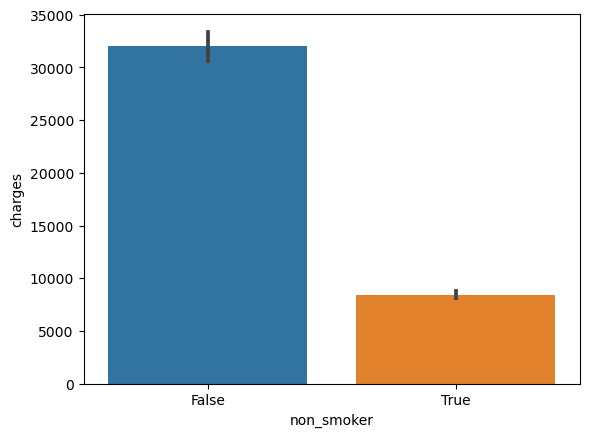

In [15]:
ax= sns.barplot(data = plot_df, x= 'non_smoker', y = 'charges')

True : Non-smoking
False : Smoking

### Testing Assumptions

In [16]:
smokers_group = smoker['charges']
non_smokers_group = non_smokers['charges']
smokers_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [17]:
non_outliers = np.abs(stats.zscore(non_smokers_group)) > 3
non_outliers.sum()

24

In [18]:
non_smokers_group = non_smokers_group.loc[~non_outliers]
non_smokers_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [19]:
smokers_outliers = np.abs(stats.zscore(smokers_group)) > 3
smokers_outliers.sum()

0

In [20]:
smokers_group = smokers_group.loc[~smokers_outliers]
smokers_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

### Test For Normalcy

In [21]:
result = stats.normaltest(non_smokers_group)
result.pvalue

2.6945416315543976e-36

In [22]:
len(non_smokers_group)

1040

In [23]:
result = stats.normaltest(smokers_group)
result.pvalue

5.564930630036463e-14

In [24]:
len(smokers_group)

274

#### Are men more likely to smoke than women?
1. State the Alternative Hypothesis & Null Hypothesis
 - (Null Hypothesis): There is no difference between men being more likely to smoke more than women.
 - (Alternative Hypothesis): There is a significant difference between men being more likely to smoke than women.
2. Select the correct test according to the data type and number of samples
- categorical columns
- Two Groups/samples
- Chi-Square

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   non_smoker  1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


In [26]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [27]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64